### Name : shayan aryania
### StudentId 402211767

# Librarires

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load Dataset

In [2]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [3]:
class KMeans:
    def __init__(self, n_clusters=5, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = []
        self.labels = []

    def fit(self, data):
        self.centroids = random.sample(list(data), self.n_clusters)

        for _ in range(self.max_iter):
            self.labels = [self._closest_centroid(point) for point in data]
            new_centroids = self._calculate_new_centroids(data)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

    def predict(self, data):
        return [self._closest_centroid(point) for point in data]

    def _closest_centroid(self, point):
        distances = [np.linalg.norm(point - centroid) for centroid in self.centroids]
        return np.argmin(distances)

    def _calculate_new_centroids(self, data):
        new_centroids = []
        for i in range(self.n_clusters):
            cluster_points = [data[j] for j in range(len(data)) if self.labels[j] == i]
            if cluster_points:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = random.choice(data)
            new_centroids.append(new_centroid)
        return new_centroids

    def elbow_method(self, data, max_k=10):
        wcss = []
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, max_iter=self.max_iter)
            kmeans.fit(data)
            wcss.append(self._calculate_wcss(data, kmeans.centroids, kmeans.labels))

        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_k + 1), wcss, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        plt.title('Elbow Method For Optimal k')
        plt.show()

    def silhouette_method(self, data, max_k=10):
        silhouette_avg = []
        for k in range(2, max_k + 1):
            kmeans = KMeans(n_clusters=k, max_iter=self.max_iter)
            kmeans.fit(data)
            score = silhouette_score(data, kmeans.labels)
            silhouette_avg.append(score)

        plt.figure(figsize=(8, 5))
        plt.plot(range(2, max_k + 1), silhouette_avg, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Method For Optimal k')
        plt.show()

    def _calculate_wcss(self, data, centroids, labels):
        wcss = 0
        for i in range(len(data)):
            centroid = centroids[labels[i]]
            wcss += np.linalg.norm(data[i] - centroid) ** 2
        return wcss


# Use elbow method and silhouette method to choose optimal cluster numbers

In [5]:
#TODO
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_data)
print(kmeans.centroids)
print(kmeans.predict(x_data))

[array([ 3.70260084e+00,  2.41144186e+01,  5.09665289e+00,  1.06856578e+00,
        2.18814047e+03,  3.11495313e+00,  3.52824837e+01, -1.19284372e+02]), array([   3.93866452,   30.87536127,    5.58536604,    1.10544877,
        910.96531792,    2.87156815,   35.79225795, -119.69144509]), array([ 4.01354013e+00,  1.64522293e+01,  5.37020865e+00,  1.07420118e+00,
        5.13047771e+03,  3.83974824e+00,  3.49484076e+01, -1.18916561e+02])]
[0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

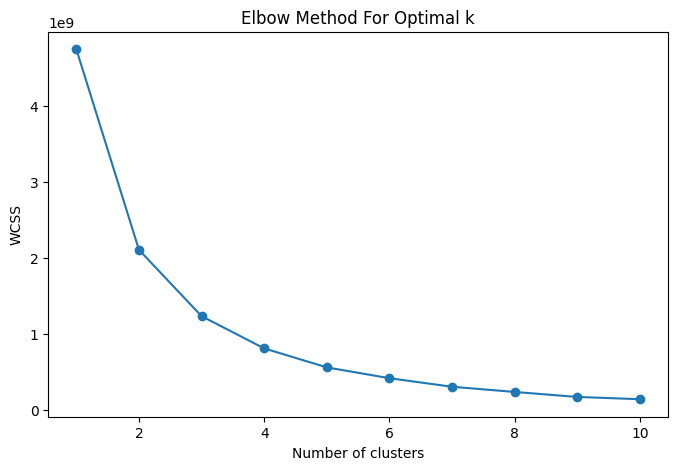

NameError: name 'silhouette_score' is not defined

In [8]:
#TODO
kmeans.elbow_method(x_data, max_k=10)
kmeans.silhouette_method(x_data, max_k=10)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method